# Energy Star Score Prediction

This is a Supervised Regression Problem with Energy Star Score as ground truth values(dependent variables) and other features as independent variable.

# Importing libraries for data analyis

In [1]:
#importing pandas as numpy for data manipulation and visualization
import pandas as pd
import numpy as np

#setting pandas dispaly option to display 60 columns at once 
pd.set_option('display.max_columns',60)

#matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline
#seaborn for visalization
import seaborn as sns

# loading the data for exploration

In [2]:
#reading and loading the data into data frame
df=pd.read_csv("Usecase1_Dataset.csv")
df22=df.copy()
#diaplying top 5 records
df.head(5)

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,10017,675,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447,Not Available,Not Available,Not Available,Not Available,1963,2,100,Whole Building,Not Available,Not Available,305.6,303.1,37.8,Not Available,614.2,Not Available,Not Available,Not Available,Not Available,Not Available,5.15506751E7,Not Available,Not Available,38139374.2,1.10827705E7,6962.2,0,6962.2,762051,Not Available,Not Available,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,10032,180,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181,Not Available,Not Available,Not Available,Not Available,1969,12,100,Whole Building,Whole Building,55,229.8,228.8,24.8,2.4,401.1,Not Available,1.96248472E7,Not Available,Not Available,Not Available,-3.914148026E8,933073441,9330734.4,332365924,9.62613121E7,55870.4,51016.4,4854.1,3889181,Not Available,Not Available,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,10032,3975,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342,Not Available,Not Available,Not Available,Not Available,1924,1,100,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,0,0,0,231342,Not Available,Not Available,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,10032,161,FT WASHINGTON AVENUE,Manhattan,891040.0,Hos

In [3]:
#checking data type and missing values in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11746 non-null  object 
 7   NYC Building Identification Number (BIN)                    11746 non-null  object 
 

Columns of target variable i.e. Energy Star Score contains null values which are mentioned as "Not Available" due to which data type is object.The Energy Start Score records with null values are part of test dataset which we will be seggregating in later part.

# Data Preprocessing

In [4]:
#replacing Not Available with the numpy nan
mapped={"Not Available":np.nan}
df=df.replace(mapped)

In [5]:
#converting the data type of some columns into float/numeric
for i in list(df.columns):
    if("ft²" in i or "kBtu" in i or "Metric Tons CO2e" in i or "kWh" in i or "therms"in i or"gal" in i or "Score" in i):
        df[i]=df[i].astype(float)

In [6]:
#checking data type and missing values in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11735 non-null  object 
 7   NYC Building Identification Number (BIN)                    11584 non-null  object 
 

# Missing Value Analysis

In [7]:
#function for generating a table with the total number of columns with missing and percentage of data which is missing

def missingValuesAnalysis(df):
    #getting the total number of records 
    l=df.shape[1]
    
    #total number of missing values per column
    missingValue=df.isnull().sum()
    
    #calculating the percentage of column within a column
    missingValuePercent=(df.isnull().sum()/len(df))*100
    
    #concatinating the total number of columns with the percentage of missing value
    missingValueAnalysis=pd.concat([missingValue,missingValuePercent],axis=1)
    
    #renaming the columns names
    missingValueAnalysis.columns=["Missing Values","Percentage of Missing Values"]
    
    #getting the number of that do not have missing values
    x=missingValueAnalysis[missingValueAnalysis.iloc[:,1]!=0].shape[0]
    
    #sorting the values
    missingValueAnalysis=missingValueAnalysis.sort_values("Percentage of Missing Values",ascending=False).round(2)

    print("Total Columns:{} \nColumns with missing values:{}".format(l,x))

    return missingValueAnalysis

In [8]:
missingValuesAnalysis(df)

Total Columns:60 
Columns with missing values:46


,Missing Values,Percentage of Missing Values
Fuel Oil #1 Use (kBtu),11737,99.92
Diesel #2 Use (kBtu),11730,99.86
Address 2,11539,98.24
Fuel Oil #5 & 6 Use (kBtu),11152,94.94
District Steam Use (kBtu),10810,92.03
Fuel Oil #4 Use (kBtu),10425,88.75
3rd Largest Property Use Type - Gross Floor Area (ft²),10262,87.37
3rd Largest Property Use Type,10262,87.37
Fuel Oil #2 Use (kBtu),9165,78.03
2nd Largest Property Use - Gross Floor Area (ft²),8005,68.15


In [9]:
# getting the columns with >50% missing
missing_df = missingValuesAnalysis(df)
missing_column=list(missing_df[missing_df["Percentage of Missing Values"]>50].index)
print("Number of columns to be removed:{}".format(len(missing_column)))

Total Columns:60 
Columns with missing values:46
Number of columns to be removed:11


## Data Cleaning

In [10]:
#dropping the colmns having missing values greater than 50%
df=df.drop(columns=list(missing_column))

In [11]:
#importing figsize to adjust the figure size
from IPython.core.pylabtools import figsize

## Data Analysis

Text(0.5, 1.0, 'Energy Star Score Distribution')

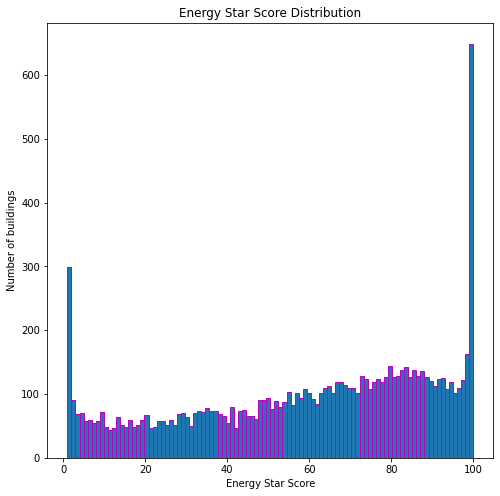

In [12]:
#setting the figure size
figsize(8,8)

#plotting the histogram plot for Energy Star Score 
plt.hist(df["ENERGY STAR Score"].dropna(),bins=100,edgecolor='m')
plt.xlabel("Energy Star Score")
plt.ylabel("Number of buildings")
plt.title("Energy Star Score Distribution")

The plot of Energy Star Score should be a completely flat distribution with each score making 1% of the total number of building.But,this is not the case in the above plot where we can see most common value being 1 and 100.

(array([1.157e+04, 7.000e+00, 4.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([     0.  ,  43463.25,  86926.5 , 130389.75, 173853.  , 217316.25,
        260779.5 , 304242.75, 347706.  , 391169.25, 434632.5 , 478095.75,
        521559.  , 565022.25, 608485.5 , 651948.75, 695412.  , 738875.25,
        782338.5 , 825801.75, 869265.  ]),
 <BarContainer object of 20 artists>)

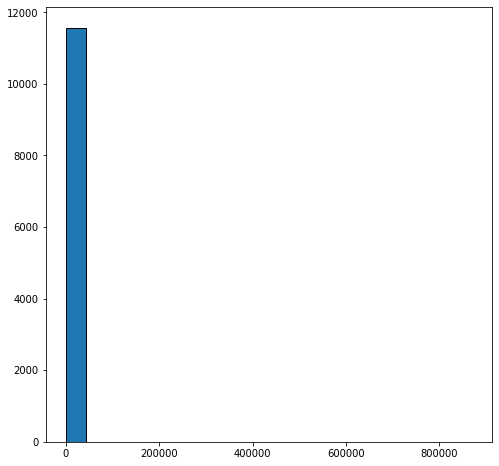

In [13]:
figsize(8,8)

#plotting histogram for Site EUI (kBtu/ft²)
plt.hist(df["Site EUI (kBtu/ft²)"].dropna(),bins=20,edgecolor="k")

The plot of Site EUI (kBtu/ft²) is a very skewed plot.We have plotted this because Energy Star Score is not good measure to rank buildings because it is a self reported rank which can have discrepencies.

## Outlier Analysis

In [14]:
#outlier analysis for Site EUI (kBtu/ft²)

#calculating first quartile for Site EUI (kBtu/ft²)
fQ=df["Site EUI (kBtu/ft²)"].describe()["25%"]

#calculating third quartile for Site EUI (kBtu/ft²)
tQ=df["Site EUI (kBtu/ft²)"].describe()["75%"]


#calculating the inter quartile region
iqr=tQ-fQ

#removing extreme outlier
df=df[(df["Site EUI (kBtu/ft²)"] > (fQ - 3*iqr)) & (df["Site EUI (kBtu/ft²)"] < (tQ + 3*iqr))]

# q75,q25=np.percentile(df["Site EUI (kBtu/ft²)"],[75,25])
# iqr=q75-q25
# mini=q25-(iqr*1.5)
# maxi=q75+(iqr*1.5)
# df=df[(df["Site EUI (kBtu/ft²)"] > mini) & (df["Site EUI (kBtu/ft²)"] < maxi)]

In [15]:
# q75,q25=np.percentile(df["Site EUI (kBtu/ft²)"],[75,25])
# iqr=q75-q25
# mini=q25-(iqr*3)
# maxi=q75+(iqr*3)

# print(fQ,tQ,mini,maxi)

In [16]:
# print(q75,q25,fQ,tQ)

(array([ 243.,  322.,  369.,  358.,  529., 1032., 1665., 1878., 1610.,
        1144.,  750.,  438.,  322.,  178.,  160.,   97.,   71.,   68.,
          45.,   40.]),
 array([  0.  ,  10.24,  20.48,  30.72,  40.96,  51.2 ,  61.44,  71.68,
         81.92,  92.16, 102.4 , 112.64, 122.88, 133.12, 143.36, 153.6 ,
        163.84, 174.08, 184.32, 194.56, 204.8 ]),
 <BarContainer object of 20 artists>)

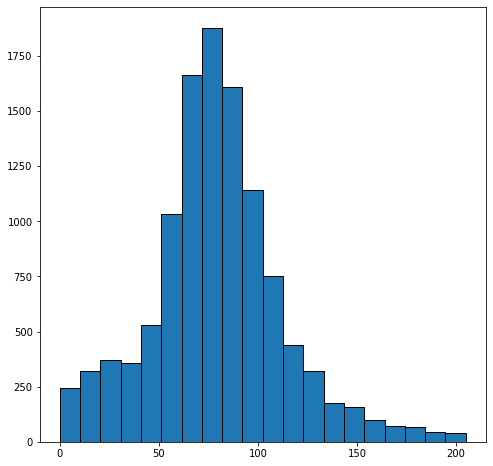

In [17]:
#plotting Site EUI (kBtu/ft²)
figsize(8,8)
plt.hist(df["Site EUI (kBtu/ft²)"].dropna(),bins=20,edgecolor="k")

After removing outlier, the plot looks more normally distributed but it still positive skewed.

In [18]:
#function to plot density plots
def densityPlots(df,v,t):
    
    #dropping target variable
    types=df.dropna(subset=["ENERGY STAR Score"])
    
    #value counts for each type of feature
    types=types[v].value_counts()
    
    #lsit of each type which is greater than 100
    types=list(types[types.values>100].index)
    
    #setting the figure size
    figsize(15,20)
    
    #plooting each subtype
    for i in types:
        req=df[df[v]==i]
    
        sns.kdeplot(req["ENERGY STAR Score"].dropna(),label=i,shade=False,alpha=0.8)
    #setting the xlabel
    plt.xlabel("Site EUI")
    
    #setting the ylabel
    plt.ylabel("Energy Star Score")
    
    #setting the title of the plot
    plt.title(t)

## Analysing categorical features

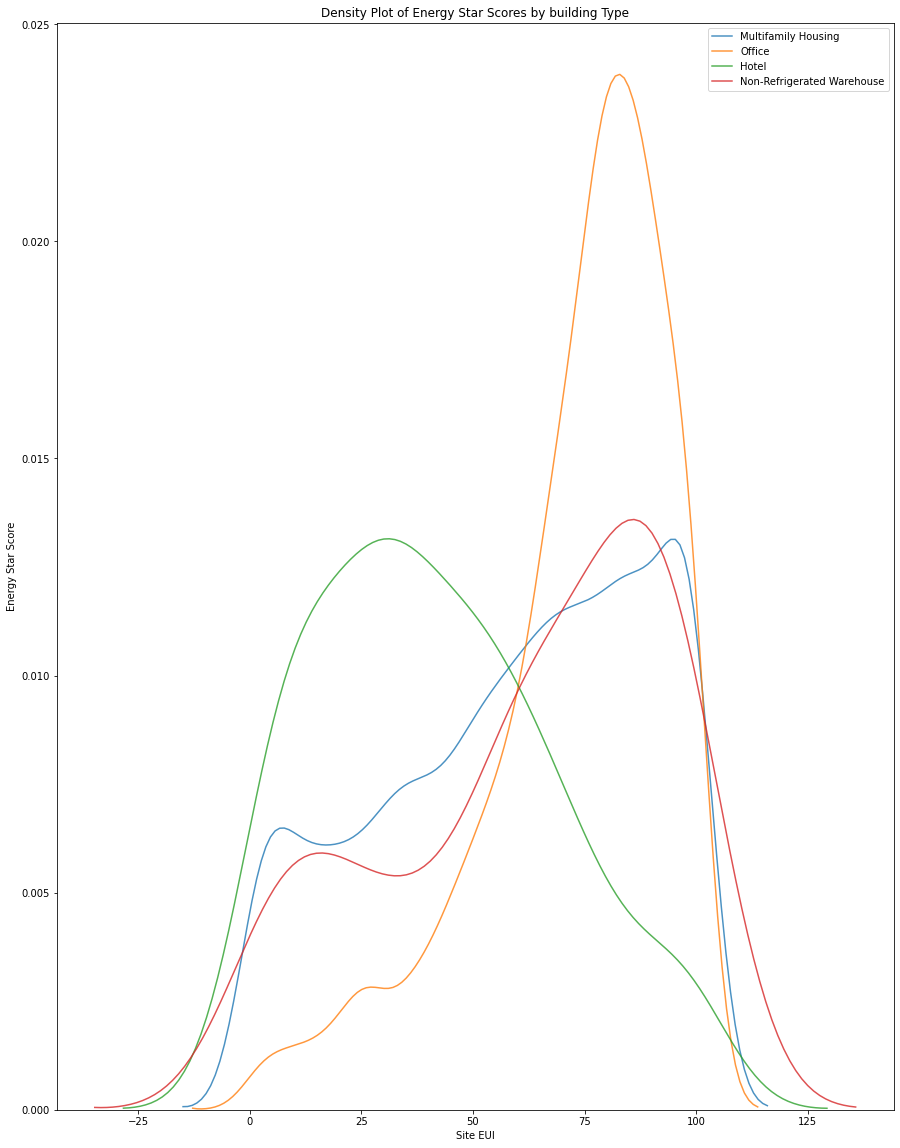

In [19]:
#plotting of Energy Star Scores by building Type
densityPlots(df,"Largest Property Use Type","Density Plot of Energy Star Scores by building Type")

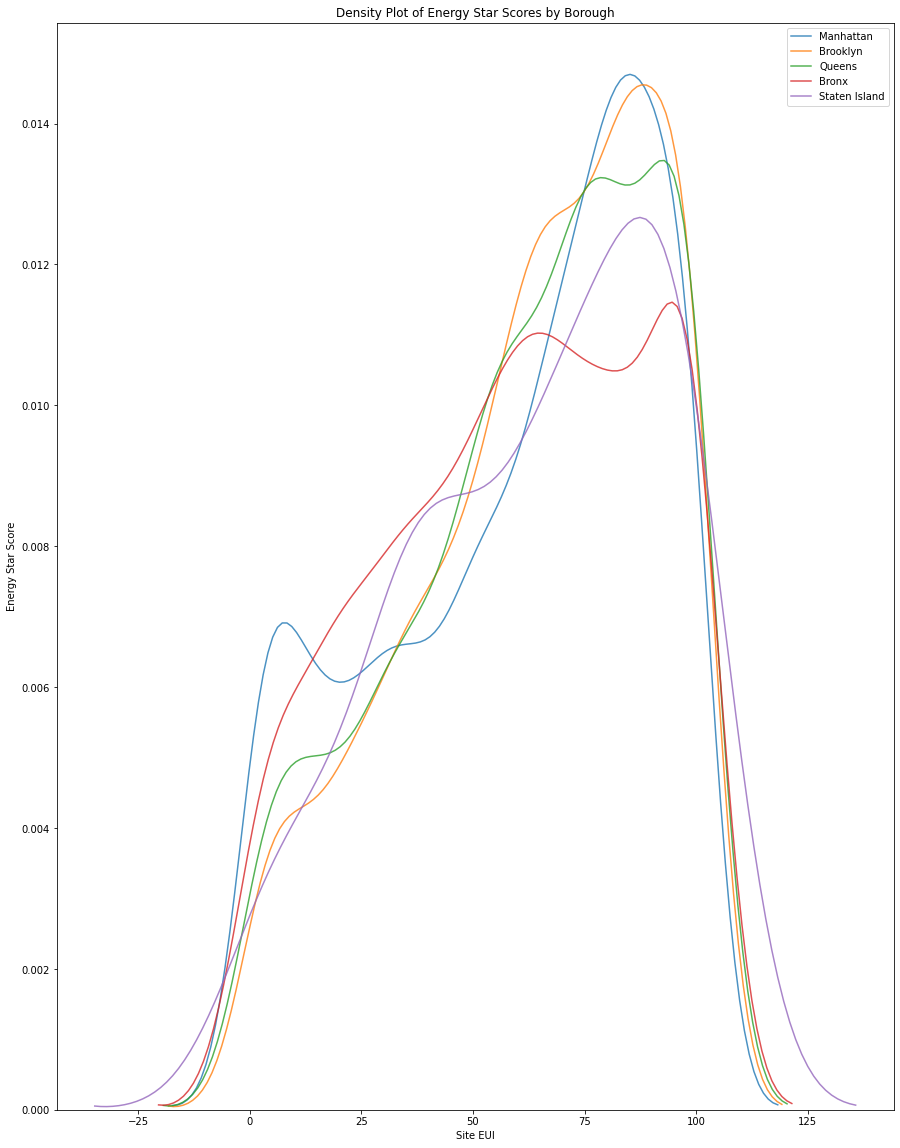

In [20]:
#plotting of Energy Star Scores by Borough
densityPlots(df,"Borough","Density Plot of Energy Star Scores by Borough")

## Correlation Analysis

In [21]:
#getting the correaltion values based on Energy star score
correlations=df.corr()["ENERGY STAR Score"].sort_values()

In [22]:
#strong negatively correlated features
print(correlations.head(10))

Site EUI (kBtu/ft²)                                          -0.723864
Weather Normalized Site EUI (kBtu/ft²)                       -0.713993
Weather Normalized Source EUI (kBtu/ft²)                     -0.645542
Source EUI (kBtu/ft²)                                        -0.641037
Weather Normalized Site Electricity Intensity (kWh/ft²)      -0.358394
Weather Normalized Site Natural Gas Intensity (therms/ft²)   -0.346046
Direct GHG Emissions (Metric Tons CO2e)                      -0.147792
Weather Normalized Site Natural Gas Use (therms)             -0.135211
Natural Gas Use (kBtu)                                       -0.133648
Year Built                                                   -0.121249
Name: ENERGY STAR Score, dtype: float64


In [23]:
#diaplying last 10 correaltion value
print(correlations.tail(10))

Water Use (All Water Sources) (kgal)                 -0.013681
Water Intensity (All Water Sources) (gal/ft²)        -0.012148
Census Tract                                         -0.002299
DOF Gross Floor Area                                  0.013001
Property GFA - Self-Reported (ft²)                    0.017360
Largest Property Use Type - Gross Floor Area (ft²)    0.018330
Order                                                 0.036827
Community Board                                       0.056612
Council District                                      0.061639
ENERGY STAR Score                                     1.000000
Name: ENERGY STAR Score, dtype: float64


## Feature Selection and Feature engineering

In [24]:
df.columns

Index(['Order', 'Property Id', 'Property Name', 'Parent Property Id',
       'Parent Property Name', 'BBL - 10 digits',
       'NYC Borough, Block and Lot (BBL) self-reported',
       'NYC Building Identification Number (BIN)', 'Address 1 (self-reported)',
       'Postal Code', 'Street Number', 'Street Name', 'Borough',
       'DOF Gross Floor Area', 'Primary Property Type - Self Selected',
       'List of All Property Use Types at Property',
       'Largest Property Use Type',
       'Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built',
       'Number of Buildings - Self-reported', 'Occupancy',
       'Metered Areas (Energy)', 'Metered Areas  (Water)', 'ENERGY STAR Score',
       'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Weather Normalized Source EUI (kBtu/ft²)', 'Natural Gas Use (kBtu)',
       'Weather Nor

In [25]:
featureToDrop=['Metered Areas  (Water)','Metered Areas (Energy)','Order','Property Id','Property Name','Parent Property Id',
    'Parent Property Name','BBL - 10 digits','NYC Borough, Block and Lot (BBL) self-reported','Address 1 (self-reported)','Postal Code', 'Street Number', 'Street Name',
    'Primary Property Type - Self Selected',
    'List of All Property Use Types at Property',
    'Largest Property Use Type - Gross Floor Area (ft²)','Year Built','Release Date', 'Water Required?',
    'DOF Benchmarking Submission Status', 'Latitude', 'Longitude','NTA']

df=df.drop(featureToDrop,axis=1)

In [26]:
import warnings
warnings.filterwarnings('ignore')


In [27]:

#choosing the numeric data type features
numeric_df=df.select_dtypes('number')
l=numeric_df

#adding sqrt and log to see the non linear relationship between the faetures except for Energy star score
for i in numeric_df.columns:
    if i=="ENERGY STAR Score":
        next
    else:
        #adding sqrt and log to see the non linear relationship between the faetures
        numeric_df["sqrt_"+i]=np.sqrt(numeric_df[i])
        numeric_df["log_"+i]=np.log(numeric_df[i])

#choosing the categorical feature       
categorical_df=df[["Largest Property Use Type","Borough"]]

#converting the feature into numeric using get dummies
categorical_df=pd.get_dummies(categorical_df)

#concatinating the numeric and categorical features
combined_df=pd.concat([numeric_df,categorical_df],axis=1)

#dropping target variable from the features set
combined_df=combined_df.dropna(subset=["ENERGY STAR Score"])

#calculating the correlation and sorting the values
correlations=combined_df.corr()["ENERGY STAR Score"].dropna().sort_values()

In [28]:
#columns having numeric data
l.columns

Index(['DOF Gross Floor Area', 'Number of Buildings - Self-reported',
       'Occupancy', 'ENERGY STAR Score', 'Site EUI (kBtu/ft²)',
       'Weather Normalized Site EUI (kBtu/ft²)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Weather Normalized Source EUI (kBtu/ft²)', 'Natural Gas Use (kBtu)',
       'Weather Normalized Site Natural Gas Use (therms)',
       'Electricity Use - Grid Purchase (kBtu)',
       'Weather Normalized Site Electricity (kWh)',
       'Total GHG Emissions (Metric Tons CO2e)',
       'Direct GHG Emissions (Metric Tons CO2e)',
       'Indirect GHG Emissions (Metric Tons CO2e)',
       'Property GFA - Self-Reported (ft²)',
       'Water Use (All Water Sources) (kgal)',
       'Water Intensity (All Water Sources) (gal/ft²)',
       'Source EUI (kBtu/ft²)', 'Community Board', 'Council District',
       'Census Tract', 'sqrt_DOF Gross Floor Area', 'log_DOF Gross Floor Ar

In [29]:
#top 10 correlation 
correlations.head(10)

Site EUI (kBtu/ft²)                             -0.723864
Weather Normalized Site EUI (kBtu/ft²)          -0.713993
sqrt_Site EUI (kBtu/ft²)                        -0.699817
sqrt_Weather Normalized Site EUI (kBtu/ft²)     -0.689019
sqrt_Weather Normalized Source EUI (kBtu/ft²)   -0.671044
sqrt_Source EUI (kBtu/ft²)                      -0.669396
Weather Normalized Source EUI (kBtu/ft²)        -0.645542
Source EUI (kBtu/ft²)                           -0.641037
log_Source EUI (kBtu/ft²)                       -0.622892
log_Weather Normalized Source EUI (kBtu/ft²)    -0.620329
Name: ENERGY STAR Score, dtype: float64

In [30]:
def snsPlot(df,v,combined_df):
    types=df.dropna(subset=["ENERGY STAR Score"])
    types=types[v].value_counts()
    types=list(types[types.values>100].index)
    figsize(15,20)
    combined_df[v]=df.dropna(subset=["ENERGY STAR Score"])[v]
    combined_df=combined_df[combined_df[v].isin(types)]
    sns.lmplot("Site EUI (kBtu/ft²)","ENERGY STAR Score",hue=v,data=combined_df,scatter_kws={"alpha":0.8,"s":60},size=13,aspect=1.1)
    plt.xlabel("Site EUI")
    plt.ylabel("ENERGY STAR Score")
    plt.title("ENERGY STAR Score vs Site EUI considering types of "+ v)

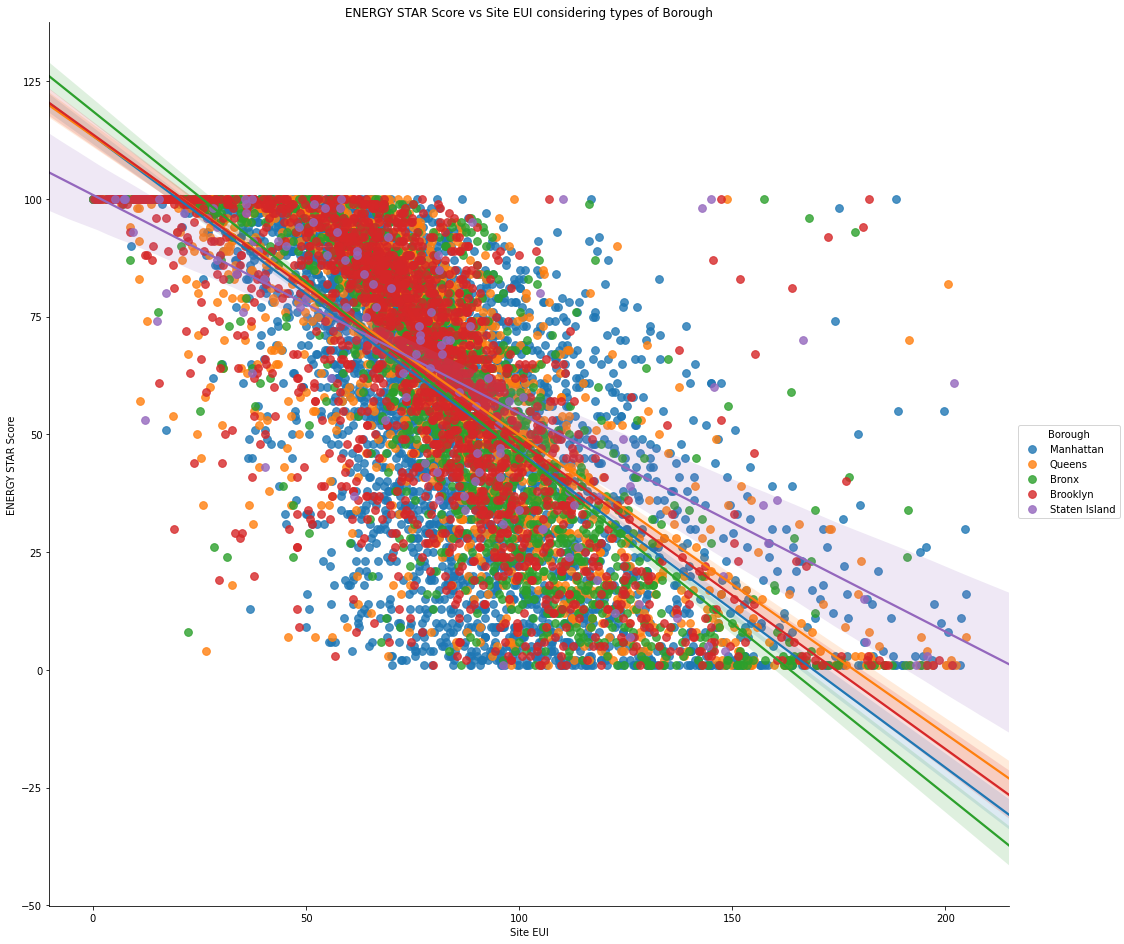

In [31]:
#plot of Energy Star Score vs Site EUI considering types of Borough
snsPlot(df,"Borough",combined_df)

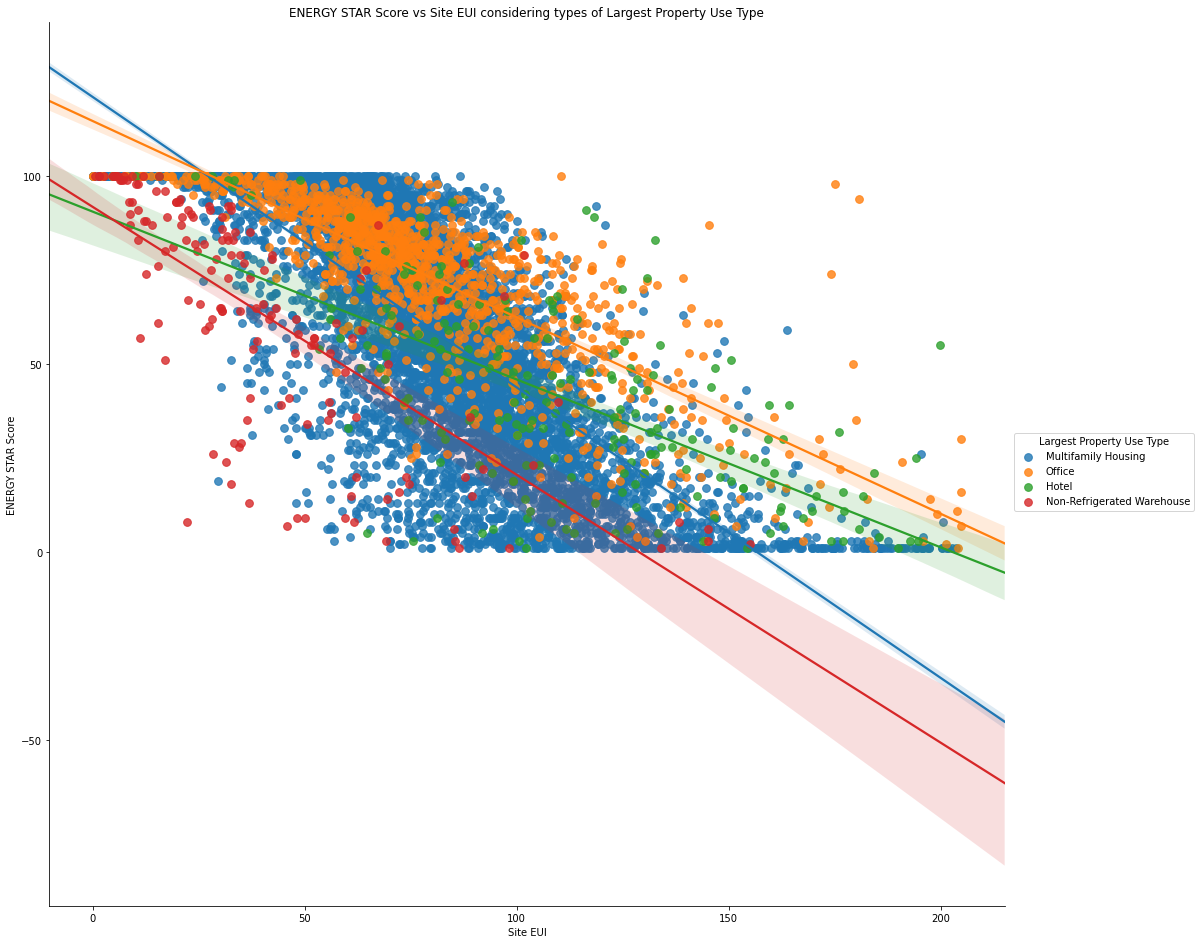

In [32]:
#plot of Energy Star Score vs Site EUI considering types of Largest property by use
snsPlot(df,"Largest Property Use Type",combined_df)

In [33]:
#shape of the final dataframe
combined_df.shape

(9461, 122)

In [34]:
combined_df.columns

Index(['DOF Gross Floor Area', 'Number of Buildings - Self-reported',
       'Occupancy', 'ENERGY STAR Score', 'Site EUI (kBtu/ft²)',
       'Weather Normalized Site EUI (kBtu/ft²)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Weather Normalized Source EUI (kBtu/ft²)', 'Natural Gas Use (kBtu)',
       ...
       'Largest Property Use Type_Urgent Care/Clinic/Other Outpatient',
       'Largest Property Use Type_Wholesale Club/Supercenter',
       'Largest Property Use Type_Worship Facility', 'Borough_Bronx',
       'Borough_Brooklyn', 'Borough_Manhattan', 'Borough_Queens',
       'Borough_Staten Island', 'Borough', 'Largest Property Use Type'],
      dtype='object', length=122)

In [35]:
#shape of the intial data frame
df.shape

(11319, 26)

In [36]:
#choosing the numeric data type features
numeric_df=df.select_dtypes('number')

#adding log to see the non linear relationship between the faetures except for Energy star score
for i in numeric_df.columns:
    if i=="ENERGY STAR Score":
        next
    else:
       
        numeric_df["log_"+i]=np.log(numeric_df[i])
        
#choosing the categorical feature         
categorical_df=df[["Largest Property Use Type","Borough"]]

#converting the feature into numeric using get dummies
categorical_df=pd.get_dummies(categorical_df)

#concatinating the numeric and categorical features
combined_df=pd.concat([numeric_df,categorical_df],axis=1)

#shape of final dataframe
combined_df.shape

(11319, 98)

## Correlation Analysis

<AxesSubplot:>

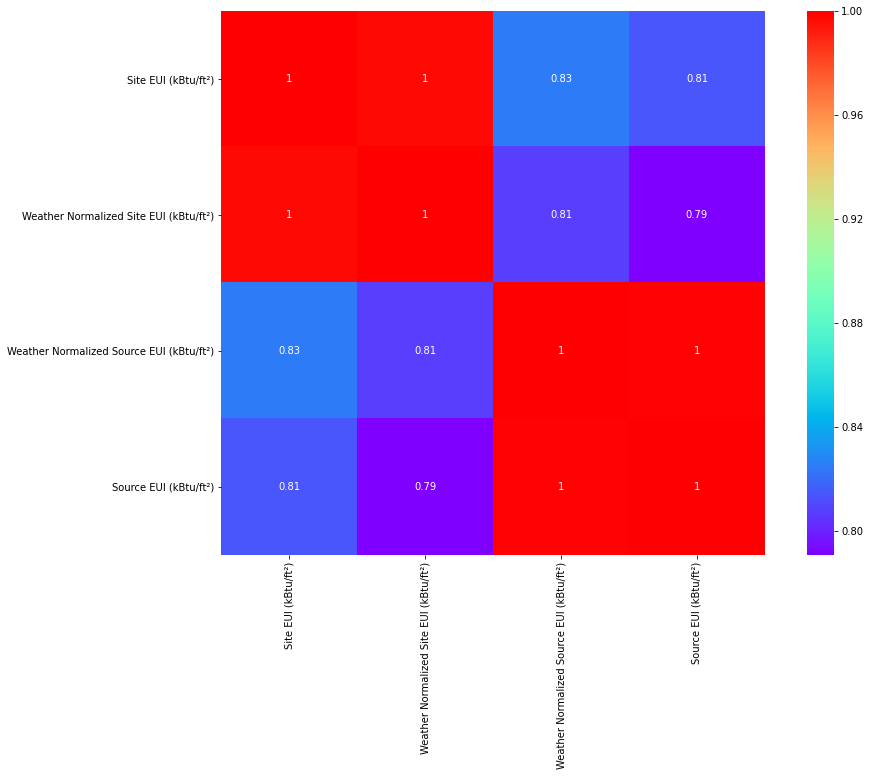

In [37]:
#heatmap for correlation Analysis
cnames=["Site EUI (kBtu/ft²)","Weather Normalized Site EUI (kBtu/ft²)","Weather Normalized Source EUI (kBtu/ft²)","Source EUI (kBtu/ft²)"]

#selecting only the certain colums for heatmap
df_corr=df.loc[:,cnames]

#setting figsize and axes for plot
f,ax=plt.subplots(figsize=(15,10))

#calculating the correlation
corr=df_corr.corr()

#plotting the heat map
sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap="rainbow",annot=True,square=True,ax=ax)

In [38]:
#checking for cloumns having more than 80% of unique data points
l=[]
x=len(df)
for i in df.columns:
    if(len(df[i].unique())>(0.8*x)):
        l.append(i)
print(l)

['NYC Building Identification Number (BIN)', 'Natural Gas Use (kBtu)', 'Weather Normalized Site Natural Gas Use (therms)', 'Electricity Use - Grid Purchase (kBtu)', 'Weather Normalized Site Electricity (kWh)', 'Property GFA - Self-Reported (ft²)']


In [39]:
#checking for cloumns having less than 10 unique data points
l=[]
x=len(df)
for i in df.columns:
    if(len(df[i].unique())<(10)):
        l.append(i)
print(l)

['Borough']


### Dropping highly correlated variables

In [40]:
#function to exclude highly correlated feature to reduce dimension
def excludeCollinearVariables(df,threshold):
    
    #assigning target variable
    y=df["ENERGY STAR Score"]
    
    #dropping target variable
    df=df.drop(columns=["ENERGY STAR Score"])
    
    #calculating the correaltion 
    correlationTensor=df.corr()
    
    #preparing list of columns to remove
    colToRemove=[]
    
    #iterating through correlation matrix and checking if the values whether higher than the given threshold
    for i in range(len(correlationTensor.columns)-1):
        for j in range(i):
            correlation=correlationTensor.iloc[j:(j+1),(i+1):(i+2)]
            col=correlation.columns
            row=correlation.index
            val=abs(correlation.values)
            
            if(val>=threshold):
                colToRemove.append(col.values[0])
    
    #filter unique columns to remove            
    columsToDrop=set(colToRemove)
    
    #droping columns to remove
    df=df.drop(columns=columsToDrop)
    df=df.drop(columns=['Weather Normalized Site EUI (kBtu/ft²)','Water Use (All Water Sources) (kgal)','log_Water Use (All Water Sources) (kgal)'])
    df["ENERGY STAR Score"]=y
    return df

In [41]:
#removing correlated data having threshold greater than 0.6
collinearRemoved=excludeCollinearVariables(combined_df,0.6)

In [42]:
#dropping columns having missing values
collinearRemoved=collinearRemoved.dropna(axis=1,how="all")

#checking the shape of data
collinearRemoved.shape

(11319, 65)

### Spliting the data into train and test set

In [43]:
#splitting the data into training and testing 
trainingdata=collinearRemoved[collinearRemoved["ENERGY STAR Score"].notnull()]
testingdata=collinearRemoved[collinearRemoved["ENERGY STAR Score"].isna()]

In [44]:
#splitting the data into independentVariables and targetVariables
independentVariables=trainingdata.drop(columns="ENERGY STAR Score")
targetVariables=pd.DataFrame(trainingdata["ENERGY STAR Score"])

#replacing infinity and and negative infinity with numpy nan
independentVariables=independentVariables.replace({np.inf:np.nan,-np.inf:np.nan})

In [45]:
from sklearn.model_selection import train_test_split
#spliting the data into training and testing
X_train,X_test,Y_train,Y_test=train_test_split(independentVariables,targetVariables,test_size=0.3,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(6622, 64)
(2839, 64)
(6622, 1)
(2839, 1)


In [46]:
#checking the current working directory
#pwd

In [47]:
#saving the training and testing data into csv files
testingdata.to_csv("testingdata.csv",index=False)
trainingdata.to_csv("trainingdata.csv",index=False)
X_train.to_csv('X_train.csv',index=False)
X_test.to_csv("X_test.csv",index=False)
Y_train.to_csv('Y_train.csv',index=False)
Y_test.to_csv("Y_test.csv",index=False)

### Importing Libraries

In [48]:
#importing minmaxScaler for normalization
from sklearn.preprocessing import MinMaxScaler

#importing linear regression model
from sklearn.linear_model import LinearRegression

#importing RandomForestRegressor,GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

#importing SVR model
from sklearn.svm import SVR

#importing KNN regressor
from sklearn.neighbors import KNeighborsRegressor

#importing mse,r2,mae metrics
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

#importing RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

## Missing values Imputation

In [49]:
#importing imputer for missing values imputation
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,copy=False,strategy="median")

In [50]:
#reading and loading the data into data frame
X_train=pd.read_csv("X_train.csv")
Y_train=pd.read_csv("Y_train.csv")
X_test=pd.read_csv("X_test.csv")
Y_test=pd.read_csv("Y_test.csv")

In [51]:
#checking the current working directory
#pwd
Xi_train=X_train
Yi_train=Y_train
Xi_test=X_test
Yi_test=Y_test

In [52]:
#imputing the missing values 
imp.fit(X_train)
X_train=imp.transform(X_train)
X_test=imp.transform(X_test)

In [53]:
df=pd.DataFrame(X_train)
df.head()
Xi_train.shape

(6622, 64)

In [54]:
#checking the missing values in training data
print("Missing values in X_train: {}".format(np.sum(np.isnan(X_train))))
print("Missing values in X_test: {}".format(np.sum(np.isnan(X_test))))

Missing values in X_train: 0
Missing values in X_test: 0


## Data normalization

In [55]:
#data normalization using min max scaler
scaler=MinMaxScaler(feature_range=(0,1))
scaler.fit(X_train)

X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [56]:

Yi=Y_train.copy()
#converting the data into numpy array
Y_train=np.array(Y_train).reshape((-1,))
Y_test=np.array(Y_test).reshape((-1,))

In [57]:
def cvScore(score):
    ''' function to calculate RMSE and r2, score is list containing Cross validation result such as r2,'train_neg_mean_squared_error'
    test_neg_mean_squared_error.This fuction prints the RMSE and R2 value for training and testing data'''
    
    print("Evaluation on Training data")
    print("Score: {}".format(np.sqrt(-score['train_neg_mean_squared_error'])))
    print("Mean Score: {}".format(np.sqrt(-score['train_neg_mean_squared_error']).mean()))
    print("R2 Score:{}".format(score['train_r2']))
    print("Evaluation on Testing data")
    print("Score: {}".format(np.sqrt(-score['test_neg_mean_squared_error'])))
    print("Mean Score: {}".format(np.sqrt(-score['test_neg_mean_squared_error']).mean()))
    print("R2 Score:{}".format(score['train_r2']))
    
    

## Training and Evaluation

We dont know about the relationship between given features and Energy Star Score,whether it is a linear or nin linear.So, we decided to use trial and error approach with default parameters setting. Then , we measured performances of all the models using the error metrics. We also look for overfitting and underfitting.After that we performed paramter tuning using random search cv and grid search.Once we got best tuned parameters.We trained best model with best possible parameter on the whole set and made prediction on the test set.

### Linear Regression

In [58]:
#training and evaluating using linear regression model
lr=LinearRegression()
from sklearn.model_selection import cross_validate
lrScore=cross_validate(lr,X_train,Y_train,scoring=("r2","neg_mean_squared_error"),cv=3,return_train_score=True)
cvScore(lrScore)

Evaluation on Training data
Score: [17.1300499  17.23990099 16.73485543]
Mean Score: 17.03493543777827
R2 Score:[0.65875164 0.65912805 0.6768244 ]
Evaluation on Testing data
Score: [17.12291123 16.8337422  17.97164014]
Mean Score: 17.30943119263507
R2 Score:[0.65875164 0.65912805 0.6768244 ]


### Support Vector Regressor

In [59]:
#training and evaluating using Support vector
svm=SVR(C=1000,gamma=0.1)
svmScore=cross_validate(svm,X_train,Y_train,scoring=("r2","neg_mean_squared_error"),cv=3,return_train_score=True)
cvScore(svmScore)

Evaluation on Training data
Score: [14.58906352 14.73732782 14.43521674]
Mean Score: 14.587202696029884
R2 Score:[0.75248122 0.75090833 0.75954088]
Evaluation on Testing data
Score: [15.04462393 14.83920082 15.56911731]
Mean Score: 15.150980684408573
R2 Score:[0.75248122 0.75090833 0.75954088]


## Random Forest Regressor

In [60]:
#training and evaluating using random forest
randomForest=RandomForestRegressor(random_state=60)
rfScore=cross_validate(randomForest,X_train,Y_train,scoring=("r2","neg_mean_squared_error"),cv=3,return_train_score=True)
cvScore(rfScore)

Evaluation on Training data
Score: [5.04240326 5.08549847 4.79672032]
Mean Score: 4.9748740165860035
R2 Score:[0.97043156 0.9703388  0.97344884]
Evaluation on Testing data
Score: [13.36468026 12.99694577 13.87357895]
Mean Score: 13.411734995141233
R2 Score:[0.97043156 0.9703388  0.97344884]


## KNN Regressor

In [61]:
#training and evaluating using Knn regressor
knn=KNeighborsRegressor()
knnScore=cross_validate(knn,X_train,Y_train,scoring=("r2","neg_mean_squared_error"),cv=3,return_train_score=True)
cvScore(knnScore)

Evaluation on Training data
Score: [13.13254482 13.30970065 13.00142548]
Mean Score: 13.147890318503995
R2 Score:[0.79943687 0.7968306  0.80493625]
Evaluation on Testing data
Score: [16.56679443 15.94382697 16.46101627]
Mean Score: 16.323879222185358
R2 Score:[0.79943687 0.7968306  0.80493625]


## Gradient Boosting Regressor

In [62]:
#training and evaluating using Gradient Boosting
GBDT=GradientBoostingRegressor(random_state=60)
GScore=cross_validate(GBDT,X_train,Y_train,scoring=("r2","neg_mean_squared_error"),cv=3,return_train_score=True)
cvScore(GScore)

Evaluation on Training data
Score: [12.32071937 12.45667137 12.04957001]
Mean Score: 12.275653583336142
R2 Score:[0.82346718 0.82203863 0.83245259]
Evaluation on Testing data
Score: [13.39147425 12.82193756 13.67777382]
Mean Score: 13.297061875565726
R2 Score:[0.82346718 0.82203863 0.83245259]


From all above trained models,we saw that Gradient boosting regressor has a good RMSE with less overfitting.Hence, we choose Gradient Boosting Regressor as final model.

## Fine-Tune best model

In [63]:
#yperparameter tuning
loss=["ls","lad","huber"]
n_estimators=[100,500,900,1100,1500]
maxDepth=[3,5,7,10,15]
minSampleSplit=[2,4,6,10]
minSampleLeaf=[1,2,4,6,8]
maxFeatures=["auto","sqrt","log2",None]
hyperParameterGrid={"loss":loss,"n_estimators":n_estimators,"max_depth":maxDepth,"min_samples_split":minSampleSplit,"min_samples_leaf":minSampleLeaf,"max_features":maxFeatures}

In [64]:
#training and evaluating gradient Boosting tree
model=GradientBoostingRegressor(random_state=42)
random_cv=RandomizedSearchCV(estimator=model,param_distributions=hyperParameterGrid,cv=5,n_iter=25,scoring="neg_mean_absolute_error",n_jobs=-1,verbose=1,return_train_score=True,random_state=42)

In [65]:
random_cv.fit(X_train,Y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'loss': ['ls', 'lad', 'huber'],
                                        'max_depth': [3, 5, 7, 10, 15],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 4, 6, 10],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=1)

In [66]:
#finding the best estimator using randomizedsearch cv
random_cv.best_estimator_

GradientBoostingRegressor(loss='lad', max_depth=5, max_features='auto',
                          min_samples_leaf=2, min_samples_split=6,
                          n_estimators=1100, random_state=42)

In [67]:
#searching the optimum tree for GBDT
treesGrid={"n_estimators":[100,150,200,250,300,350,400,600,800,1100,1300,1500]}
model=GradientBoostingRegressor(loss="lad",max_depth=5,min_samples_leaf=2,min_samples_split=6,max_features=None,random_state=42)
gridSearch=GridSearchCV(estimator=model,param_grid=treesGrid,cv=4,scoring="neg_mean_absolute_error",verbose=1,n_jobs=-1,return_train_score=True)

In [68]:
gridSearch

GridSearchCV(cv=4,
             estimator=GradientBoostingRegressor(loss='lad', max_depth=5,
                                                 min_samples_leaf=2,
                                                 min_samples_split=6,
                                                 random_state=42),
             n_jobs=-1,
             param_grid={'n_estimators': [100, 150, 200, 250, 300, 350, 400,
                                          600, 800, 1100, 1300, 1500]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [69]:

gridSearch.fit(X_train,Y_train)

Fitting 4 folds for each of 12 candidates, totalling 48 fits


GridSearchCV(cv=4,
             estimator=GradientBoostingRegressor(loss='lad', max_depth=5,
                                                 min_samples_leaf=2,
                                                 min_samples_split=6,
                                                 random_state=42),
             n_jobs=-1,
             param_grid={'n_estimators': [100, 150, 200, 250, 300, 350, 400,
                                          600, 800, 1100, 1300, 1500]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [70]:
#default model
DefaultModel=GradientBoostingRegressor(random_state=42)

#final model
final_model=gridSearch.best_estimator_
final_model

GradientBoostingRegressor(loss='lad', max_depth=5, min_samples_leaf=2,
                          min_samples_split=6, n_estimators=600,
                          random_state=42)

In [78]:
fScore=cross_validate(final_model,X_train,Y_train,scoring=("r2","neg_mean_squared_error"),cv=3,return_train_score=True)
cvScore(fScore)

Evaluation on Training data
Score: [11.39244139 11.58370993 10.95013933]
Mean Score: 11.308763547746002
R2 Score:[0.84906605 0.84610764 0.86163256]
Evaluation on Testing data
Score: [12.97036482 12.45633591 13.63673522]
Mean Score: 13.021145316273381
R2 Score:[0.84906605 0.84610764 0.86163256]


## Predictions

In [71]:
finalPred=final_model.predict(X_test)

In [72]:
finalPred=pd.DataFrame(finalPred)

In [73]:
finalPred=finalPred.astype(int)
finalPred.columns=["Prediction"]

In [74]:
finalPred

,Prediction
0,15
1,51
2,52
3,83
4,80
...,...
2834,87
2835,95
2836,82
2837,68


In [75]:
def grade(x):
    if x>=85 and x<=100:
        return 'A'
    elif x>=70 and x<=85 :
        return 'B'
    elif x>=55 and x<=70 :
        return 'C'
    elif x<=50 and x>=0:
        return 'D'
    elif x<0 and x>100:
        return 'Failed to Submit'
    else:
        return "Not Covered"

In [76]:
finalPred["Predicted Band"]=finalPred["Prediction"].apply(grade)

In [77]:
finalPred

,Prediction,Predicted Band
0,15,D
1,51,Not Covered
2,52,Not Covered
3,83,B
4,80,B
...,...,...
2834,87,A
2835,95,A
2836,82,B
2837,68,C
